## **Data Preprocessing**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from cleantext import clean
import re

### **Data Reading**

In [3]:
df = pd.read_csv("dialects_database.csv")

In [4]:
df.head(50)

,id,text,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY
5,877881537122979840,@alibobkr63 او حتى من اي دين او طائفة. اسف ممك...,LY
6,882940840888471552,@muhamed01111 باهي نستنوه. بلكي مشغول ولا حاجة,LY
7,882941769444466688,@muhamed01111 مهما اختلفنا راه نحنا خوت. والله...,LY
8,882943694906818560,@muhamed01111 بالنسبة ليا انا والله شبعت هم ون...,LY
9,884736569118261248,@Ajo32asLibya @Jed_ly مو نحنا الحياة عندنا مية...,LY


In [5]:
df.dialect.unique()

array(['LY', 'MA', 'EG', 'LB', 'SD'], dtype=object)

- LY -> Libya
- MA -> Morocco
- EG -> Egypt
- LB -> Lebanon
- SD -> Sudan

In [6]:
mapper = {
    'LY': 0,
    'MA': 1,
    'EG': 2,
    'LB': 3,
    'SD': 4    
}

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147725 entries, 0 to 147724
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       147725 non-null  int64 
 1   text     147725 non-null  object
 2   dialect  147725 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


### **Data Splitting**

In [8]:
x = df.text

In [9]:
y = df.dialect

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### **Data Investigation**

In [26]:
x_train.head(30)

<class 'pandas.core.series.Series'>
Index: 118180 entries, 31120 to 43567
Series name: text
Non-Null Count   Dtype 
--------------   ----- 
118180 non-null  object
dtypes: object(1)
memory usage: 5.8+ MB


In [12]:
x_train.info()

<class 'pandas.core.series.Series'>
Index: 118180 entries, 31120 to 43567
Series name: text
Non-Null Count   Dtype 
--------------   ----- 
118180 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [13]:
len(x_train), len(y_train)

(118180, 118180)

In [14]:
x_train.isnull().sum()

0

In [15]:
x_train.duplicated().sum()

0

In [16]:
y_train.unique()

array(['LY', 'LB', 'EG', 'MA', 'SD'], dtype=object)

In [17]:
ly_count = y_train[y_train == 'LY'].count()
ly_count

29199

In [18]:
lb_count = y_train[y_train == 'LB'].count()
lb_count

22026

In [19]:
eg_count = y_train[y_train == 'EG'].count()
eg_count

46182

In [20]:
ma_count = y_train[y_train == 'MA'].count()
ma_count

9306

In [21]:
sd_count = y_train[y_train == 'SD'].count()
sd_count

11467

<Axes: >

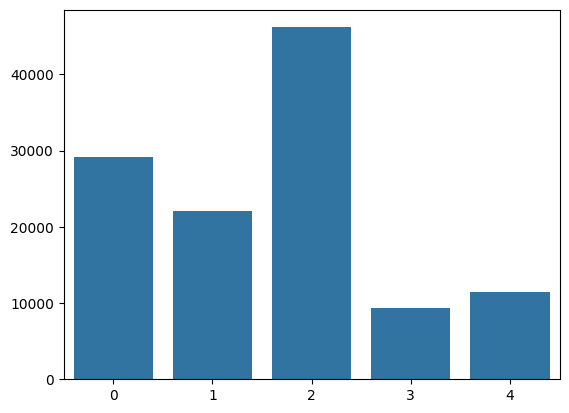

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist
sns.barplot([ly_count, lb_count, eg_count, ma_count, sd_count], )

**Notes:**
- There is no null values.
- There is no duplicates.
- Data are imbalanced

**Handling Imbalance Data**
1. **Resampling Methods:**
    - **Over-sampling techniques:**
       - SMOTE (Synthetic Minority Over-sampling Technique)
       - ADASYN (Adaptive Synthetic Sampling) generate synthetic samples for the minority class to balance the dataset.
    - **Under-sampling techniques:**
       - randomly remove samples from the majority class to achieve class balance.

2. **Algorithmic Approaches:**
    - **Cost-sensitive learning:**
        - adjusts the misclassification costs to account for class imbalance during model training.
    - **Ensemble methods:** 
        - such as Random Forest and XGBoost inherently handle class imbalance by aggregating predictions from multiple models.
3. **Hybrid Methods:**
    - Hybrid methods combine over-sampling and under-sampling techniques to achieve a balanced dataset while preserving the information in the original data.

**Note:**
- I will handle imbalancing during training when using tree algorithm specifically XGBoost as my traditional ML Algorithm (**Algorithmic Approach**) 

### **Preprocessing Steps**
1. Remove all English Words(Names) 
2. Remove Numbers
3. Remove Special Characters Like:
    - @, #, :, ", ،, ., \n, !, _, ?, /, -, ), (, %, $, &, *, ؛
4. Remove Emojis
5. Remove Links

In [23]:
x_train.head(2)

31120                       كارثة بعد يقعد راجل دمه ثقيل 💩✋
117838    رئيس الجمهورية يفعل ويقول ما يشاء...\nواللي مش...
Name: text, dtype: object

In [24]:
def preprocessing(text):

    pattern = re.compile(r'[À-ÿ]')
    text = pattern.sub('', text)

    pattern = re.compile(r'https?://\S+|www\.\S+')
    text= pattern.sub(' ', text)

    pattern = re.compile(r'\b[a-zA-Z0-9]+\b|[@#:()%$؟&*\\u"،\\.!_\\n!?؛/-]')
    text = pattern.sub(' ', text)
    
    pattern = re.compile(r'\b[a-zA-Z0-9]+\b')
    text = pattern.sub(' ', text)

    pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"
    "\U0001F300-\U0001F5FF"
    "\U0001F680-\U0001F6FF"
    "\U0001F700-\U0001F77F"
    "\U0001F780-\U0001F7FF"
    "\U0001F800-\U0001F8FF"
    "\U0001F900-\U0001F9FF" 
    "\U0001FA00-\U0001FA6F" 
    "\U0001FA70-\U0001FAFF"
    "\U00002702-\U000027B0"
    "\U000024C2-\U0001F251" 
    "]+", flags=re.UNICODE)

    text = pattern.sub(' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return pattern.sub('', text)

In [25]:
processed_data = x_train.apply(preprocessing)

In [26]:
processed_data[:50]

31120                          كارثة بعد يقعد راجل دمه ثقيل
117838    رئيس الجمهورية يفعل ويقول ما يشاء واللي مش عاج...
110584    صالة المغادرة اللي في المطار هي اللي المفروض ا...
110362    كيفك يا حاج انا ماحجت بس عملت عمرة قوليلى يا عمرى
91607     ده غير انى مش هكلمك عن الإيجابية والسلبية بقى ...
2217      عمري انت ونحنا ناطرينك وكتير متشوقين بس خايفة ...
58728     الناس بتستسهل عشان قريبين وبضاعتهم رخيصة القان...
64072                             إستناني ياسيسي أنا مش جاي
125912    عفوا انا بنت بعلبك بس هيدا الكلام مش صحيح,بيعل...
19512                         وين يبيعو فلحظوظ نبى نشرى منه
22240     توا حني مرات نمشو 100ك باش انديرو امبكبكة نعتب...
78214     يا رب ما نكره الكورة بعد ماتش النهاردة اكتر ما...
92637     انا بحب الصور جدا عشان دايما هيا الي بتفضل ومب...
113318           هيدا احمد محتال عامل حالو مسكين هوا الحرية
12724                                  شكرا يا شهيد عالهدية
83892      محمد صبحي مش عشان الموهبه بس لكن هو اكترهم ثقافه
110763    رجعنا من جديد يا اتباع ابو صرّ

In [27]:
len(processed_data)

118180

In [28]:
y_train = y_train.replace(mapper)
y_train

31120     0
117838    3
110584    3
110362    3
91607     2
         ..
41993     1
97639     2
95939     2
117952    3
43567     1
Name: dialect, Length: 118180, dtype: int64

In [29]:
len(y_train)

118180

In [30]:
train_data = pd.DataFrame({
    "text": processed_data, 
    "dialect": y_train
})

In [31]:
len(train_data)

118180

In [32]:
train_data.head()

,text,dialect
31120,كارثة بعد يقعد راجل دمه ثقيل,0
117838,رئيس الجمهورية يفعل ويقول ما يشاء واللي مش عاج...,3
110584,صالة المغادرة اللي في المطار هي اللي المفروض ا...,3
110362,كيفك يا حاج انا ماحجت بس عملت عمرة قوليلى يا عمرى,3
91607,ده غير انى مش هكلمك عن الإيجابية والسلبية بقى ...,2


In [33]:
y_test = y_test.replace(mapper)
y_test

21445     0
130471    3
11748     0
1215      0
92752     2
         ..
144034    4
132017    3
16610     0
67650     2
11926     0
Name: dialect, Length: 29545, dtype: int64

In [34]:
test_data = pd.DataFrame({
    "text": x_test.apply(preprocessing), 
    "dialect": y_test
})

In [35]:
test_data

,text,dialect
21445,أحبــك بــ مقدار كرهـي لكــ,0
130471,"والله انا كان صايبني متلك , بس هالايام صار بدك...",3
11748,لما تاخد مقلب في روحك,0
1215,احليلنا باهي اللي طلعتي يا زو,0
92752,والله ما عارف هوصل ولا هشطب ف نص الطريق الأعما...,2
...,...,...
144034,تتنظم بس أول جديد,4
132017,يلي بجرب مجرب عقلو مخرب,3
16610,و ما زال تشوف بس أعصابك يا خالد الصهد بتاعك طا...,0
67650,عمري ما بحلف بس اقسم بالله صورته بتعصبني حتي ل...,2


In [36]:
train_data.isnull().sum()

text       0
dialect    0
dtype: int64

In [37]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 118180 entries, 31120 to 43567
Series name: dialect
Non-Null Count   Dtype
--------------   -----
118180 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


In [38]:
train_data.to_csv('train_data.csv', index=False)

In [39]:
test_data.to_csv('test_data.csv', index=False)